In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
from pathlib import Path
import pandas as pd

In [3]:
path = Path('/home/ubuntu/data/autopsy/milestone/suicide_homicide_accident_undertermined/no_preprocessing')

In [4]:
df = pd.read_csv(path/'data.csv')
df.head()

,label,text,is_valid
0,Undetermined,\n.MICRO.\nHEART: The left ventricle demonstr...,False
1,Homicide,\n.MICRO.\nNONE\n.LOCATIONTrunk\n.INJURYFirear...,False
2,Suicide,\n.MICRO.\nNONE\n.LOCATIONHead\n.INJURYFirearm...,False
3,Accident,\n.MICRO.\nHeart-Mild myocyte hypertrophy. \n\...,False
4,Accident,\n.MICRO.\nNONE\n.LOCATIONHead and neck\n.INJU...,False


In [5]:
df.tail()

,label,text,is_valid
7931,Homicide,"\n.MICRO.\nHEART: Occasional, hypertrophic myo...",True
7932,Homicide,\n.MICRO.\nNONE\n.LOCATIONHead\n.INJURYFirearm...,False
7933,Accident,"\n.MICRO.\nBRAIN: No significant, histopatholo...",True
7934,Suicide,\n.MICRO.\nNONE\n.LOCATIONHead\n.INJURYBlunt i...,False
7935,Suicide,\n.MICRO.\nHEART: No significant histopatholog...,False


In [6]:
df['label'].value_counts()

Accident        4635
Suicide         2082
Homicide         960
Undetermined     259
Name: label, dtype: int64

In [6]:
df['text'][1]

"\n.MICRO.\nNONE\n.LOCATIONTrunk\n.INJURYFirearm injury.\n.INJURYDESC.\nEntrance: On the left back, centered approximately 14 inches below the top of the head and 10-1/2 inches left of posterior midline, is an entrance gunshot wound, consisting of a 1/2 inch round defect with circumferential, 1/8 inch dark red marginal abrasion and a rim of purple marginal contusion. No soot, stippling, or unburned gunpowder particles are visible on the skin surrounding this wound.\n\nExit: None.\n\nTerminus: The wound track terminates in the tip of the left scapula.\n\nPath: The hemorrhagic wound track involves the skin and soft tissue of the left back and the left scapula.\n\nAssociated findings: The left scapula is fractured.\n\nRecovery: A copper jacketed missile is recovered from within the left scapula.\n\nTrajectory: The wound track travels from the decedent's back to front, left to right, and downward.\n\n\n\n\n\n\n.LOCATIONTrunk\n.INJURYFirearm injury.\n.INJURYDESC.\nEntrance: On the left back

In [7]:
df['text'][0]

'\n.MICRO.\nHEART:  The left ventricle demonstrates geographic fibrosis consistent with a remote infarction.  Myocyte hypertrophy is present, as well as perivascular fibrosis and interstitial fibrosis outside the area of infarction.  Patchy fibrosis is present within the interventricular septum, consistent with remote infarction.  \n\nKIDNEY:  Sclerotic glomeruli, arteriolosclerosis, tubular atrophy, interstitial fibrosis and patchy lymphocytic inflammatory interstitial infiltrate present.  Polarized light examination demonstrates finely refractile fragments diffusely, involving all compartments, as well as larger aggregates of polarizable material located within tubules and vessels.  \n\nLIVER:  Cirrhosis present, demonstrated by islands of hepatocytes separated by strands of fibrosis.  Bile ductular proliferation present, as well as increased lymphoplasmacytic inflammatory infiltrate without interface activity.  Zone 3 necrosis present.  Fine miniscule polarizable fragments present w

In [8]:
df['text'][2]

'\n.MICRO.\nNONE\n.LOCATIONHead\n.INJURYFirearm injury.\n.INJURYDESC.\nEntrance:\n\nWithin the oral cavity on the soft palate, slightly left of the midline, is an entrance gunshot wound consisting of an oval defect.  Soot and unburned gunpowder particles are visible on the mucosa surrounding the wound.\n\nPath:\n\nThe hemorrhagic wound track sequentially perforates the mucosa of the soft palate, maxilla, left side of the clivus, pons, midbrain, left basal ganglia and left parietal lobe .  \n\nAssociated injuries include approximately 50 ml of clotted subdural hemorrhage overlying the left posterior cerebral convexity; left inferior frontal and temporal subarachnoid hemorrhage; inferior cerebellar subarachnoid hemorrhage; laceration of the left occipital lobe; fractures of the clivus, left and right anterior cranial fossae, and right parietal and temporal bones on the calvarium; a hinge-type basal skull fracture; and hemoaspiration.\n\nExit:\n\nNo exit.\n\nRecovery:\n\nRecovered in the 

In [9]:
df['text'][4]

'\n.MICRO.\nNONE\n.LOCATIONHead and neck\n.INJURYBlunt injury.\n.INJURYDESC.\nBLUNT FORCE INJURIES OF HEAD AND NECK\nScattered on the right and left forehead are dried red-orange abrasions.  On the right frontal scalp is a full-thickness laceration (1 x Â½ inches) with a visible underlying skull fracture. Blood exudes from the right external auditory meatus. Scattered dried red-orange abrasions are on the nose, left lateral upper face, right cheek, temple, posterior auricular region and right anterolateral neck. A confluent dried red-brown abrasion overlies the majority of the right chin and left submentum. Overlying the majority of the right lateral neck is a red oval contusion. There are intraoral contusions of the upper and lower labial mucosa.\n\nThe calvarium and upper facial bones, including the nose are palpably fractured. The maxilla and mandible have fractures, some with oral mucosal lacerations.  The cervical spine is palpably fractured.\n\n\n.LOCATIONTrunk\n.INJURYBlunt inju

In [10]:
df['text'][3038]

'\n.MICRO.\nHeart: negative\n\nLungs: congestion\n\nLiver: moderate chronic periportal inflammation\n\nKidney: negative\n\nSpinal cord: Hemorrhage\n.LOCATIONNeck\n.INJURYFirearm injury.\n.INJURYDESC.\nOn the left lateral neck centered 17 cm below the top of the head, 4.5 cm directly below the left ear canal and 10 cm to the left of the posterior midline as measured around the curvature of the neck is an oval 1.0 x 0.7 cm gunshot entrance wound. \nSurrounding the wound is an oval dense area of powder stippling measuring 8 cm in vertical axis and 6 cm in horizontal axis. The stippling involves the left side of the neck and the inferior portion of the left ear.\n\nSubsequent autopsy reveals a perforating gunshot wound of the neck.  The bullet  goes through the musculature of the left side of the neck and strikes the posterior third cervical vertebrae causing fractures of the vertebrae and hemorrhage into the surrounding ligaments and muscles. The bullet then goes through the musculature o

In [11]:
df['text'][3040]

'\n.MICRO.\nHEART:  Myocyte hypertrophy\n\nLIVER:  Minimal steatosis\n\nLUNG:  No significant histopathologic abnormalities.\n\nKIDNEY: No significant histopathologic abnormalities.\n\nSKIN:  No evidence of soot is present on the skin of the entrance wound margin.\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nEXTERNAL\nA 2.5 x 0.5 cm red abrasion is on the superior lateral left orbit.\n\nA 2 x 1 cm scaphoid red abrasion is on the inferior lateral left orbit.\n\nA 4 x 2 cm roughly rectangular red abrasion is on the left cheek.\n\nA 10 x 5 cm roughly rectangular vertical red abrasion is on the lateral left mandible.\n\nA 3.5 x 2 cm red abrasion is on the superior left pinna, associated with a 2 cm laceration in the crux of the helix.\n\nINTERNAL\nA displaced fracture is palpable in the anterior right mandible. \n\n.LOCATIONBack\n.INJURYBlunt injury.\n.INJURYDESC.\nA 3.5 x 1 cm red abrasion is on the posterior right shoulder.\n\n.LOCATIONExtremities\n.INJURYBlunt injury.\n.INJURYDES

In [12]:
df['text'][3041]

'\n.MICRO.\nNONE\n.LOCATIONHead and neck\n.INJURYBlunt injury.\n.INJURYDESC.\nMultiple lacerations are on the scalp. A 2.5 x 0.4  cm and 0.3 cm deep laceration is on the right parietal scalp, near the vertex. The right occipital scalp has a 2.5 x 1.1 cm and 0.3 cm deep laceration. Also on the occipital scalp, is a superficial 1 x 0.6 cm laceration.  A laceration is behind the ear, measuring 1.8 x 1.5 cm. Multiple red abrasions are present on the left face with the largest measuring 2.2 x 0.8 cm below the left eye.\n\nThe calvarium and facial bones are palpably intact.\n\nThe neck has scattered red contusions, measuring up to 4 cm in greatest dimension.\n\n\n.LOCATIONTrunk\n.INJURYBlunt injury.\n.INJURYDESC.\nThe chest is asymmetrical. \n\nScattered red abrasions are on the chest and abdomen, ranging from 0.1 to 2 cm. \n\nA large, red abrasion spans across the shoulders, mid back, and right lower back, involving approximately 65% of the posterior trunk surface area. A15 x 9 cm, red-pink

In [13]:
bs=32

In [14]:
data_clas = TextClasDataBunch.from_csv(path, 'data.csv',  bs=bs)

In [15]:
data_clas.show_batch()

text,target
"xxbos \n xxup .micro . \n xxmaj heart - no significant histopathology \n\n xxmaj lungs - patchy extravasation of red blood cells into the intra - alveolar space \n\n xxmaj kidneys - no significant histopathology \n\n xxmaj liver - no significant histopathology \n\n xxmaj hippocampus - no significant histopathology \n\n xxmaj xxunk - vaginal , anal , and oral smears negative for xxunk components . \n .locationhead and neck \n",Homicide
xxbos \n xxup .micro . \n xxmaj lung : xxmaj atelectasis . xxmaj foci of intralveolar erythrocytes . \n\n xxmaj heart : xxmaj left ventricular myocyte hypertrophy . \n\n xxmaj liver : xxmaj severe steatosis . xxmaj multifocal intralobular chronic inflammation . \n\n xxmaj kidney : xxmaj occasional sclerotic glomeruli . \n\n xxmaj brain : xxmaj no significant histopathologic diagnosis . \n .locationextremity \n .injuryother . \n xxup .injurydesc .,Homicide
"xxbos \n xxup .micro . \n xxup heart : patchy hyperchromatic , enlarged myocyte nuclei \n\n xxup lung : patchy intra - alveolar edema , few areas of interstitial and intra - alveolar erythrocytes \n\n xxup liver : lobular macrosteatosis \n\n xxup kidney : no significant histopathologic diagnosis \n\n xxup brain : scattered intraparenchymal and subarachnoid hemorrhages composed of intact erythrocytes \n\n xxup skin xxup at xxup xxunk a :",Homicide
"xxbos \n xxup .micro . \n xxmaj heart : xxmaj sections of the heart show unremarkable endocardial and epicardial surfaces . xxmaj there is no identifiable myocardial ischemia or inflammation . \n\n xxmaj lungs : xxmaj multiple sections of the lungs show profound atelectasis without inflammation , edema or fibrosis . xxmaj foci of extravasated blood . xxmaj no polarizable material is identified . \n\n xxmaj liver : a section",Homicide
"xxbos \n xxup .micro . \n xxup none \n .locationhead \n .injurysharp injury . \n xxup .injurydesc . \n xxup stab xxup wound xxup of xxup left xxup temple ( y ) \n\n xxmaj on the left temple , 10 cm below the top of the head , 12.5 cm left of the anterior midline ( measured around the head ) and 4 cm anterior - superior to the left",Homicide


In [16]:
learn = text_classifier_learner(data_clas, drop_mult=0.5, qrnn=True, emb_sz=300, nh=198, nl=1)

learn.freeze()

In [17]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.811281,1.230306,0.604534


In [18]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.757937,0.947409,0.644836


In [19]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.624539,0.561431,0.813602


In [20]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.548510,0.645948,0.840050


In [21]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.517407,0.635101,0.840050
2,0.557451,0.537855,0.858312


In [22]:
learn.fit_one_cycle(20, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.550547,0.538525,0.853904
2,0.511254,0.524012,0.856423
3,0.565875,0.516307,0.863350
4,0.479817,0.519973,0.860202
5,0.532844,0.517000,0.862720
6,0.492054,0.503147,0.862091
7,0.506510,0.537328,0.850756
8,0.438193,0.508676,0.858312
9,0.426751,0.569804,0.840050
10,0.464767,0.540523,0.861461


In [23]:
from fastai.vision import *

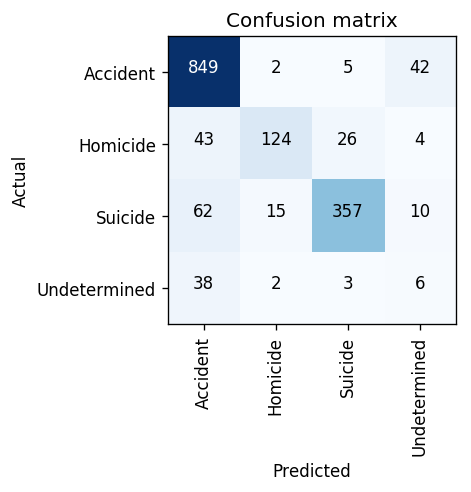

In [24]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

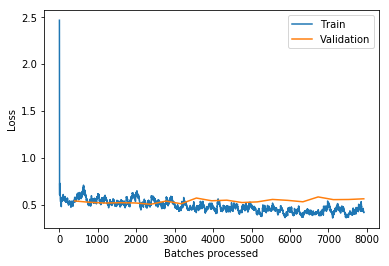

In [25]:
learn.recorder.plot_losses()

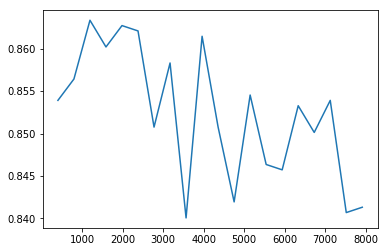

In [26]:
learn.recorder.plot_metrics()